In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [237]:
hr=pd.read_csv(r'C:\Users\Vikas\Downloads\hr_data.csv')
print('Dimension of data set:-',hr.shape)
hr.head()

Dimension of data set:- (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# EDA-Exploratory Data Analysis

In [238]:
#count the number of employe who left and who retained
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

* 0 means retained
* 1 means left

In [239]:
#left=hr[hr.left==1]
#left.shape


In [240]:
#retained=hr[hr.left==0]
#retained.shape

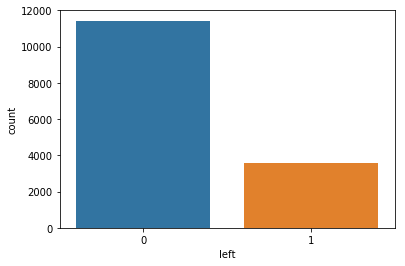

In [241]:
sns.countplot(hr['left'])

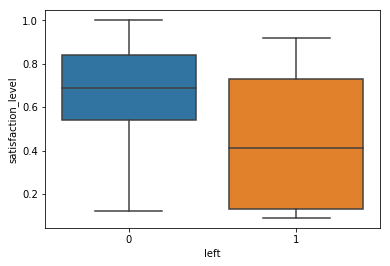

In [242]:
#Effect of Employee satisfaction on employee attrition
sns.boxplot(x='left',y='satisfaction_level',data=hr)

Lower the satisfaction level higher chances employee leaving

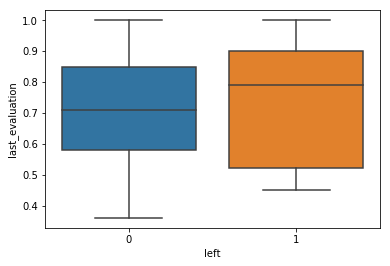

In [243]:
#Effect of last performance evaluation on employee attrition
sns.boxplot(x='left',y='last_evaluation',data=hr)

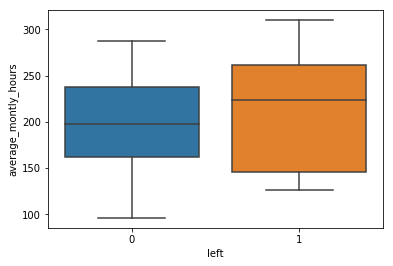

In [244]:
#Effect of more hour at work on employee attrition
sns.boxplot(x='left',y='average_montly_hours',data=hr)

from figure we clerly see that higher the working hours higher chances employee leaving

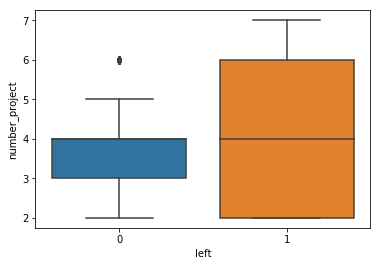

In [245]:
#effcect of number of project on employee attrition
sns.boxplot(x='left',y='number_project',data=hr)

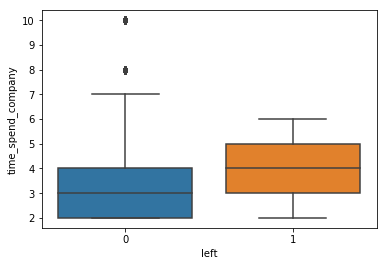

In [246]:
#Does time spent in the company influence person's decision to leave the company
sns.boxplot(x='left',y='time_spend_company',data=hr)

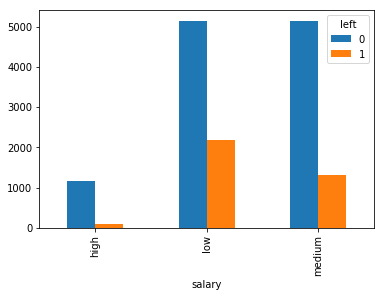

In [247]:
#impact of salary on employee retention
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

from graph we clearly see that high salary employee are not intereted to leave the company

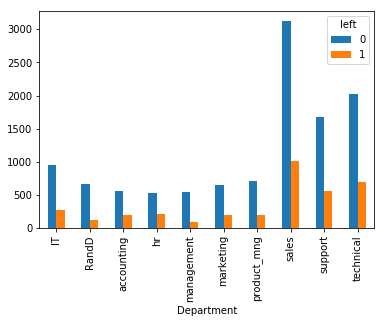

In [248]:
#distribution of department on employee attrition
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

In [249]:
#checking null value
hr.isnull().any()
#hr.isnull().sum()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [250]:
#checking columns data types
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

# convertion of text data into number


# Method 1

In [251]:
#Salary has all text data. It needs to be converted to numbers
hr['salary']=hr['salary'].apply(lambda salary:0 if salary=='low' else 1)

In [252]:
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1


# Method 2

In [253]:
#by using dummy variable
#pd.get_dummies(hr['salary'],prefix='salary')


In [254]:
#now drop the unnecessary columns salary_high and store them in a variable
#salary_dummy=pd.get_dummies(hr['salary'],prefix='salary',drop_first=True)
#salary_dummy.head(2)


In [255]:
#now add them in a data
#hr=pd.concat([hr,salary_dummy],axis=1)
#hr.head(2)

In [256]:
#now ther is no need of salary column so we remove it
#hr.drop(['salary'],axis=1,inplace=True)

In [257]:
#hr.head(2)

# Method 3

In [258]:
#hr['salary'] = hr['salary'].map({'low':0,'medium':1,'high':2})
#hr.head()

In [259]:
#now we remove the unnecessary columns
hr.drop(['Department'],axis=1,inplace=True)

In [260]:
#here,we check my columns is removed or not
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1


# Train data

In [261]:
x=hr.drop(['left'],axis=1)
y=hr['left']

In [262]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression
hrlog=LogisticRegression() #create the object

In [264]:
#now fit the model
hrlog.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [265]:
hrlog.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [266]:
#Accuracy of the model
hrlog.score(x_test,y_test)

0.776

# Deceision tree 

In [267]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10,min_samples_split=5,random_state=1)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [268]:
tree_prediction=tree.predict(x_test)
print(tree_prediction)

[0 0 0 ... 0 0 1]


In [269]:
#checking accuracy
print('Feature importances:',tree.feature_importances_)
print('model score:-',tree.score(x_test,y_test))

Feature importances: [0.52723627 0.14734086 0.10444902 0.07248354 0.14686741 0.00059792
 0.         0.00102498]
model score:- 0.9763333333333334


# Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=100,random_state=1)

In [271]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [272]:
print('model score:-',forest.score(x_test,y_test))
print('feature importance:-',forest.feature_importances_)

model score:- 0.978
feature importance:- [0.31136457 0.12671088 0.20797816 0.15868693 0.17757532 0.01001017
 0.00163644 0.00603753]
